In [37]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [38]:
data = np.loadtxt("data.txt")

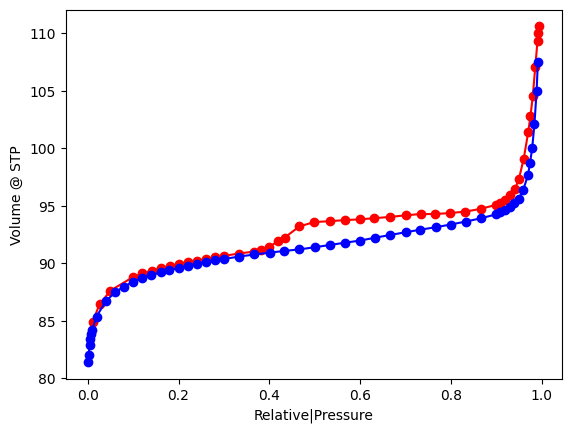

In [60]:
p,a=np.split(data,2,axis=1)
plt.ylabel('Volume @ STP')
plt.xlabel('Relative|Pressure')
a_max = np.argmax(a)
plt.plot(p[a_max:], a[a_max:], marker='o', c='r')
plt.plot(p[:a_max], a[:a_max], marker='o', c='b')
plt.show()

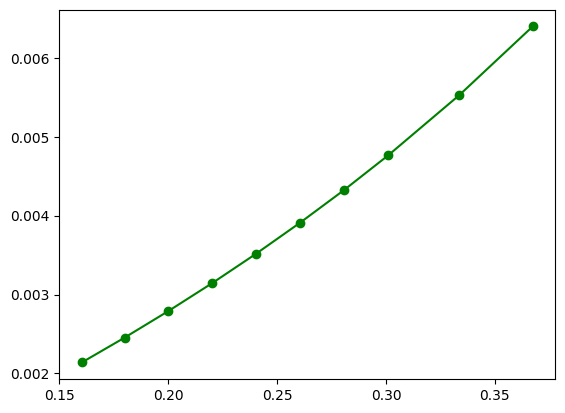

In [70]:
new_y = p/(a*(1-p))
N = 23
plt.plot(p[13:N], new_y[13:N], marker='o', c='g')
plt.show()

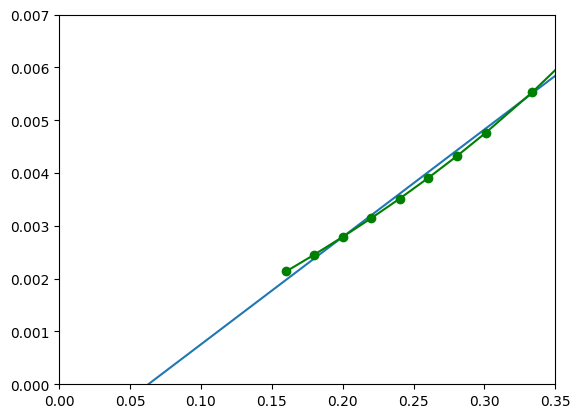

Line 0.02034625481917238*x + -0.001278817696806581
R value 0.9932943305668016


In [63]:
def lin_reg(N):
    model = LinearRegression()
    model.fit(p[13:N], new_y[13:N])
    r = model.score(p[13:N], new_y[13:N])
    k = model.coef_[0][0]
    b = model.intercept_[0]
    return k, b, r
k, b, r = lin_reg(N)
plt.xlim(0, 0.35)
plt.ylim(0, 0.007)
plt.plot([0, 1], [b, k + b], marker = 'o')
plt.plot(p[13:N], new_y[13:N], marker='o', c='g')
plt.show()
print(f"Line {k}*x + {b}")
print(f"R value {r}")

In [68]:
def calc_consts(k, b):
    c = k/b + 1
    am = 1 / (b*c) /22.4*10**-3
    print(f"Am = {am}\nC = {c}")
    Na =  6.022140 * (10**23)
    wm = 16.2 * (10**-20)
    As = Na * am * wm
    print(f"A = {As}")
calc_consts(k, b)

Am = 0.002341313982385802
C = -14.910207428299076
A = 228.41547349133424


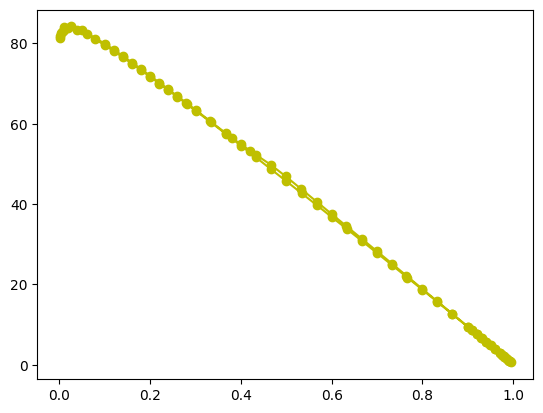

P/P0 max = [0.0259255]


In [43]:
P0 = 1
Rokkel_y = a * P0 * (1 - p)
Rokkel_y_max = np.argmax(Rokkel_y)
plt.plot(p, Rokkel_y, marker='o', c='y')
plt.show()
print(f"P/P0 max = {p[Rokkel_y_max]}")

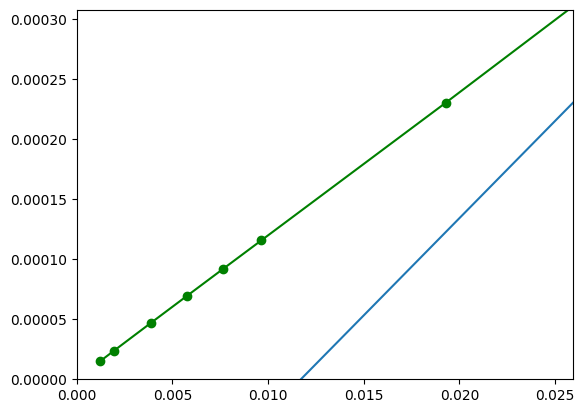

Line 0.016197769738265578*x + -0.00018978401178225326
R value 0.9862056826442438
Am = 62.46882131745145
C = -84.34844208504731
A = 6.094374999260568e+18


In [59]:
k, b, r = lin_reg(Rokkel_y_max)
plt.xlim(0, p[Rokkel_y_max])
plt.ylim(0, new_y[Rokkel_y_max])
plt.plot([0, 1], [b, k + b], marker = 'o')
plt.plot(p[:Rokkel_y_max], new_y[:Rokkel_y_max], marker='o', c='g')
plt.show()
print(f"Line {k}*x + {b}")
print(f"R value {r}")
calc_consts(k, b)